In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
from sklearn.datasets import load_iris

In [15]:
dataset = load_iris()

In [16]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_scaled = scaler.fit_transform(df)

In [21]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [22]:
## Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  ## converting 4 dimentions to two
pca_scaled = pca.fit_transform(X_scaled)

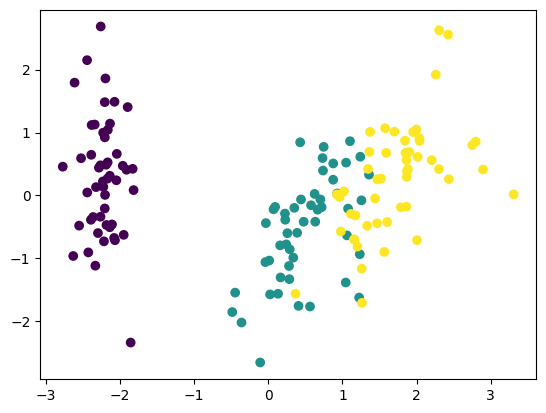

In [23]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c= dataset.target)

Text(0, 0.5, 'Eucledian Distance')

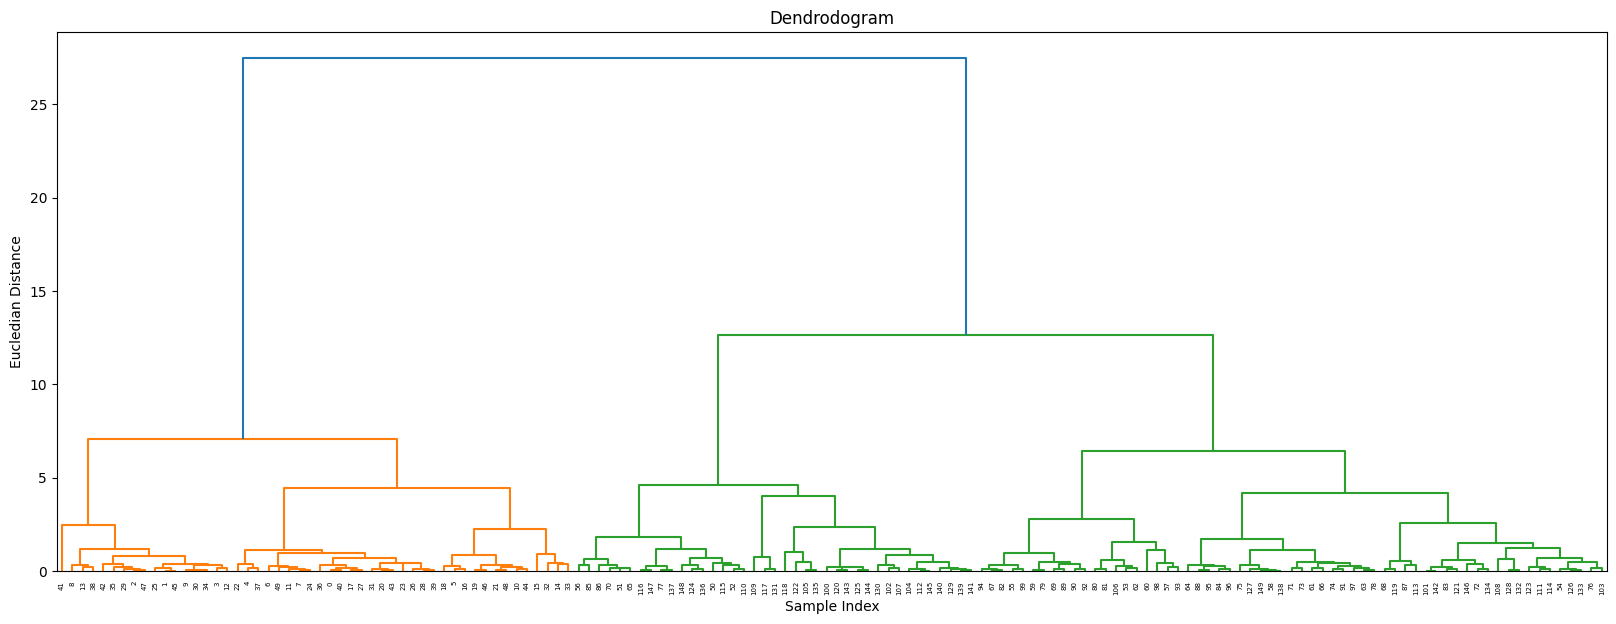

In [25]:
## Agglomerative Clustering
## To construct a dendogram

import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title("Dendrodogram")
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [30]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

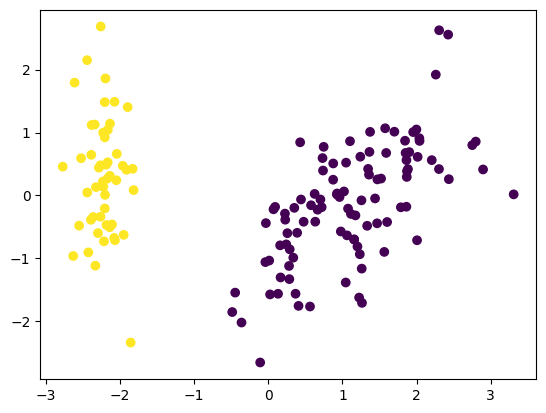

In [31]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [32]:
## silhouette score
from sklearn.metrics import silhouette_score

In [34]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

In [36]:
silhouette_coefficients

[np.float64(0.5770346019475988),
 np.float64(0.4466890410285909),
 np.float64(0.4006363159855973),
 np.float64(0.33058726295230545),
 np.float64(0.31485480100512825),
 np.float64(0.316969830299128),
 np.float64(0.310946529007258),
 np.float64(0.31143422475471655),
 np.float64(0.3161120375980681)]

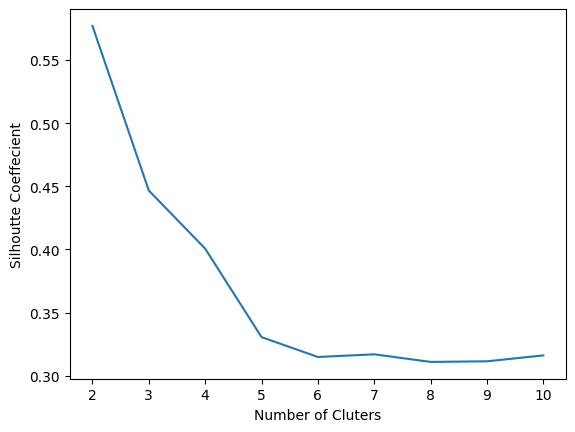

In [35]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()